In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

Kb = sc.Boltzmann

# Lecture 04

## Exercises 04.1 and 04.2

The first thing we do is to improve the provided Molecular Dynamics (MD) code by:
1. enabling the possibility to restart reading not only an actual spatial configuration [$\vec{r}(t)$] file but also an old spatial configuration [$\vec{r}(t-dt)$] file;
2. adding the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature;
3. including block averaging.

The fact that we are now able to equilibrate the system before starting the simulation will be shown in the next exercise.

# Exercise 04.3

We want to simulate the behavior of the three phases (solid, liquid, gas) of Argon (a system of $108$ particles of it) with the MD code. The particles interact with each other following the Lennard-Jones potential with $\varepsilon=120k_B$ and $\sigma=0.34nm$.

### Solid

For the solid phase we use: $\rho^*=1.1$, $T^*=0.8$ (cut-off radius: $r_c=2.2$) in LJ units.

We simulate the evolution of the system starting from a fcc configuration.
First we equilibrate the system, repeating a cycle of $1000$ steps six times, using the last configuration of a cycle as the starting point for the next one. Please note that in the following plot (and all the others in this notebook) a measurement was taken only every $10$ steps to reduce the computational time.

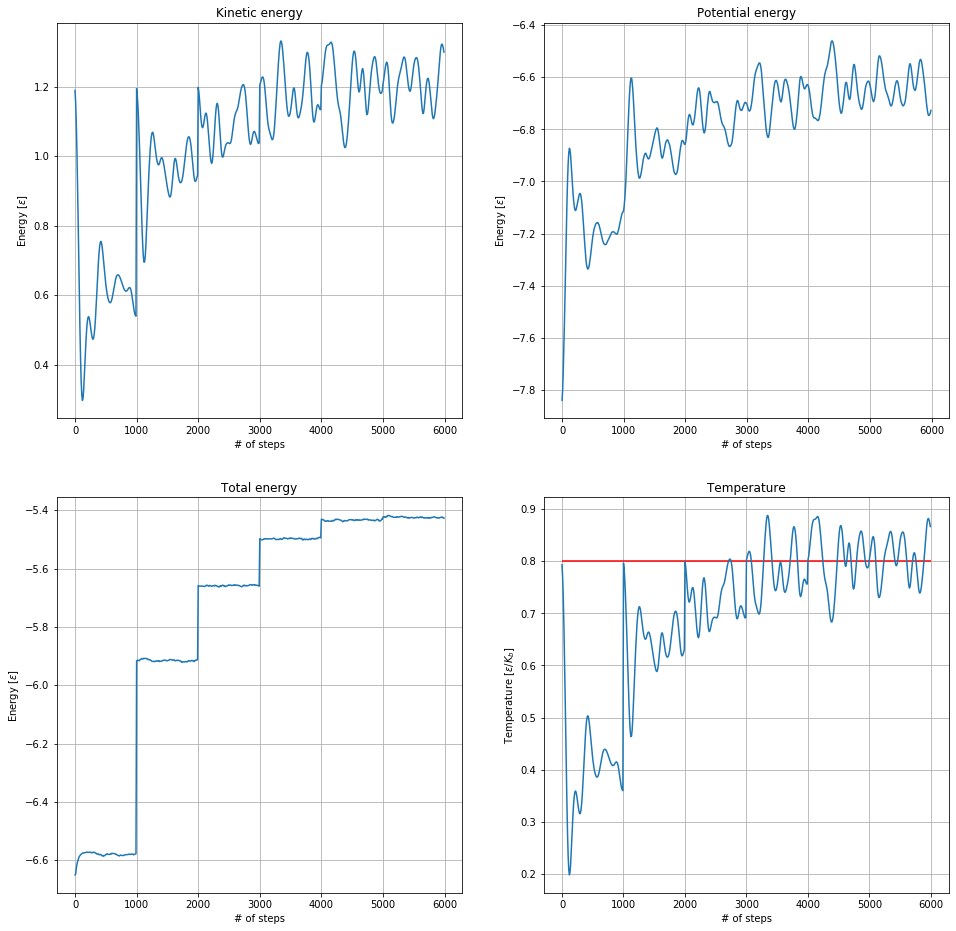

In [2]:
ekin=np.loadtxt("final_solid/EQoutput_ekin.dat")
epot=np.loadtxt("final_solid/EQoutput_epot.dat")
etot=np.loadtxt("final_solid/EQoutput_etot.dat")
temp=np.loadtxt("final_solid/EQoutput_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(steps, ekin)
plt.title("Kinetic energy")
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(222)
plt.plot(steps, epot)
plt.title('Potential energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(223)
plt.plot(steps, etot)
plt.title('Total energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(224)
plt.hlines(0.8,0,len(temp)*10, color='red')
plt.plot(steps, temp)
plt.title('Temperature')
plt.xlabel('# of steps')
plt.ylabel(r"Temperature [$\varepsilon/K_b$]")
plt.grid(True)

plt.show()

We can see that the system has reached the equilibrium as the energies and the temperature do not change significantly during the last cycles.

We can now simulate a larger numbers of steps and find average values. We procede with $10^5$ steps divided in $100$ blocks, starting from the equilibrated configuration.

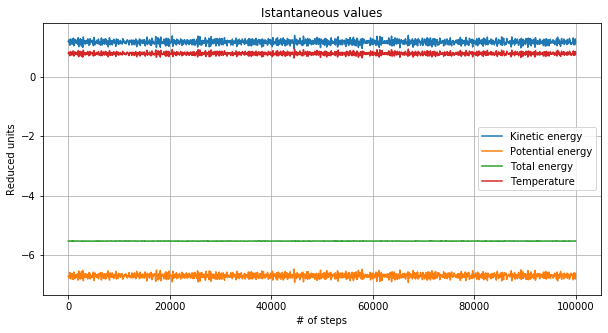

In [3]:
ekin=np.loadtxt("final_solid/output_ekin.dat")
epot=np.loadtxt("final_solid/output_epot.dat")
etot=np.loadtxt("final_solid/output_etot.dat")
temp=np.loadtxt("final_solid/output_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

plt.figure(figsize=(10,5))
plt.plot(steps, ekin, label='Kinetic energy')
plt.plot(steps, epot, label='Potential energy')
plt.plot(steps, etot, label='Total energy')
plt.plot(steps, temp, label='Temperature')
plt.title('Istantaneous values')
plt.xlabel('# of steps')
plt.ylabel('Reduced units')
plt.legend()
plt.grid(True)

plt.show()

By plotting instantaneous values of the energies and the temperature we can clearly see how the total energy changes very little compared to the others quantities. This means that the Verlet algorithm used in the code is working as intended, as it should keep the total energy constant (we want this because we are working in the micro-canonical ensemble).

The following graph shows instead average values and their uncertainties.

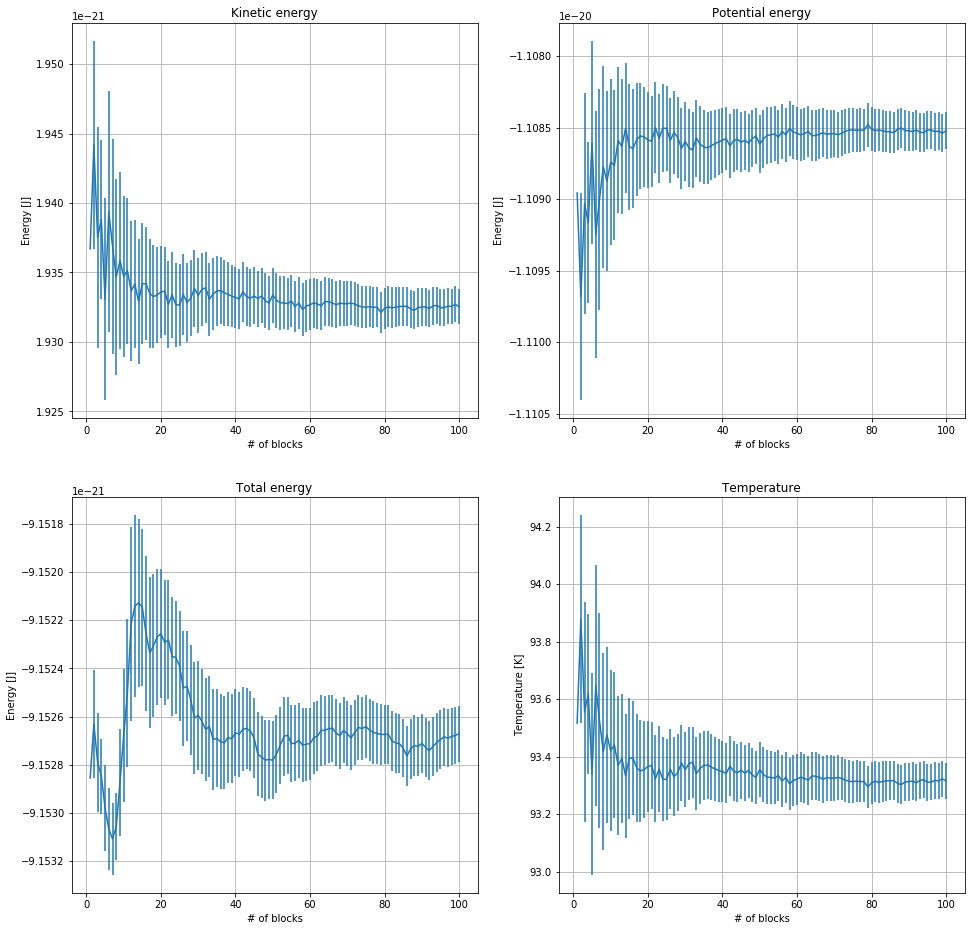

On the last block
Kinetic energy:  1.9325395422573748e-21 ± 1.283455458493241e-24
Potential energy:  -1.1085210710219807e-20 ± 1.3089342297008492e-24
Total energy:  -9.15267116796243e-21 ± 1.1650109971988188e-25
Temperature:  93.315545304 ± 0.061973555172000004


In [4]:
blocksA, ekin, err_ekin=np.loadtxt("final_solid/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksB, epot, err_epot=np.loadtxt("final_solid/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksC, etot, err_etot=np.loadtxt("final_solid/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksD, temp, err_temp=np.loadtxt("final_solid/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.errorbar(blocksA, ekin*120*Kb, yerr=err_ekin*120*Kb)
plt.title("Kinetic energy")
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(222)
plt.errorbar(blocksB, epot*120*Kb, yerr=err_epot*120*Kb)
plt.title('Potential energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(223)
plt.errorbar(blocksC, etot*120*Kb, yerr=err_etot*120*Kb)
plt.title('Total energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(224)
plt.errorbar(blocksD, temp*120, yerr=err_temp*120)
plt.title('Temperature')
plt.xlabel('# of blocks')
plt.ylabel("Temperature [K]")
plt.grid(True)

plt.show()

print('On the last block')
print('Kinetic energy: ', ekin[99]*120*Kb, '±', err_ekin[99]*120*Kb)
print('Potential energy: ', epot[99]*120*Kb, '±', err_epot[99]*120*Kb)
print('Total energy: ', etot[99]*120*Kb, '±', err_etot[99]*120*Kb)
print('Temperature: ', temp[99]*120, '±', err_temp[99]*120)

The average values also confirm the conservation of total energy, as it oscillates less than the kinetic and potential energies and has a smaller error. The temperature is smaller than the target one ($96K$), but this is to be expected in the micro-canonical ensemble. 

### Liquid

For the liquid phase we use: $\rho^*=0.8$, $T^*=1.1$ (cut-off radius: $r_c=2.5$) in LJ units.
We simulate the evolution of the system starting from the last solid configuration; this will make the system reach an equilibrium configuration faster, as the starting configuration will be less ordinated than a fcc crystal.
Again we first equilibrate the system, repeating a cycle of $1000$ steps six times, using the last configuration of a cycle as the starting point for the next one.

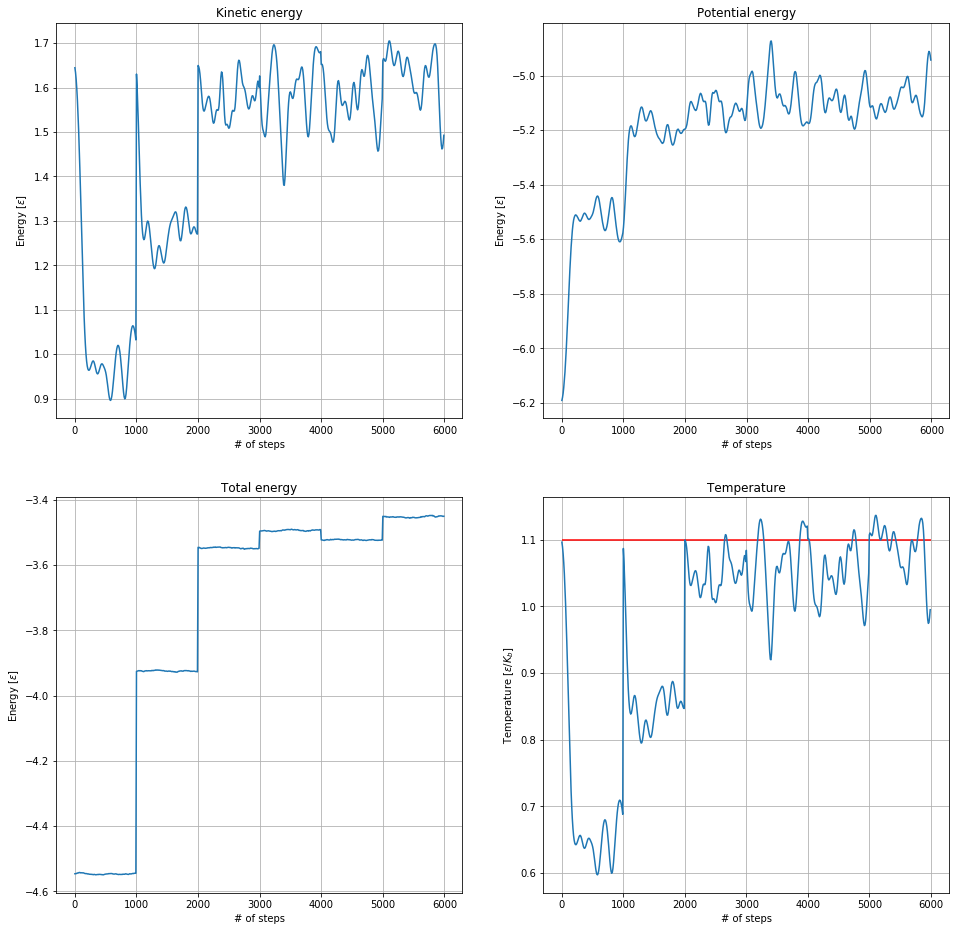

In [5]:
ekin=np.loadtxt("final_liquid/EQoutput_ekin.dat")
epot=np.loadtxt("final_liquid/EQoutput_epot.dat")
etot=np.loadtxt("final_liquid/EQoutput_etot.dat")
temp=np.loadtxt("final_liquid/EQoutput_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(steps, ekin)
plt.title("Kinetic energy")
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(222)
plt.plot(steps, epot)
plt.title('Potential energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(223)
plt.plot(steps, etot)
plt.title('Total energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(224)
plt.hlines(1.1,0,len(temp)*10, color='red')
plt.plot(steps, temp)
plt.title('Temperature')
plt.xlabel('# of steps')
plt.ylabel(r"Temperature [$\varepsilon/K_b$]")
plt.grid(True)

plt.show()

We can see that the system has reached the equilibrium as the energies and the temperature do not change significantly during the last cycles.

We can now simulate a larger numbers of steps and find average values. We procede with $10^5$ steps divided in $100$ blocks.

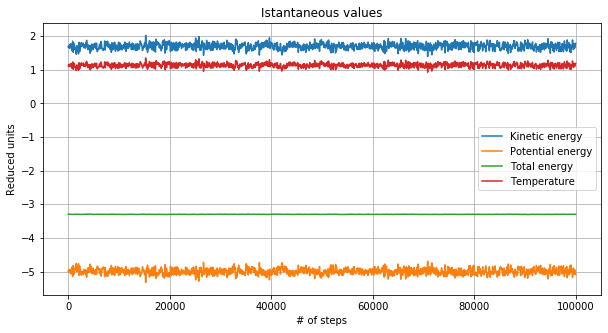

In [6]:
ekin=np.loadtxt("final_liquid/output_ekin.dat")
epot=np.loadtxt("final_liquid/output_epot.dat")
etot=np.loadtxt("final_liquid/output_etot.dat")
temp=np.loadtxt("final_liquid/output_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

plt.figure(figsize=(10,5))
plt.plot(steps, ekin, label='Kinetic energy')
plt.plot(steps, epot, label='Potential energy')
plt.plot(steps, etot, label='Total energy')
plt.plot(steps, temp, label='Temperature')
plt.title('Istantaneous values')
plt.xlabel('# of steps')
plt.ylabel('Reduced units')
plt.legend()
plt.grid(True)

plt.show()

By plotting instantaneous values of the energies and the temperature we can clearly see how the total energy changes very little compared to the others quantities. Once again the Verlet algorithm is working as intended.

The following graph shows instead average values and their uncertainties.

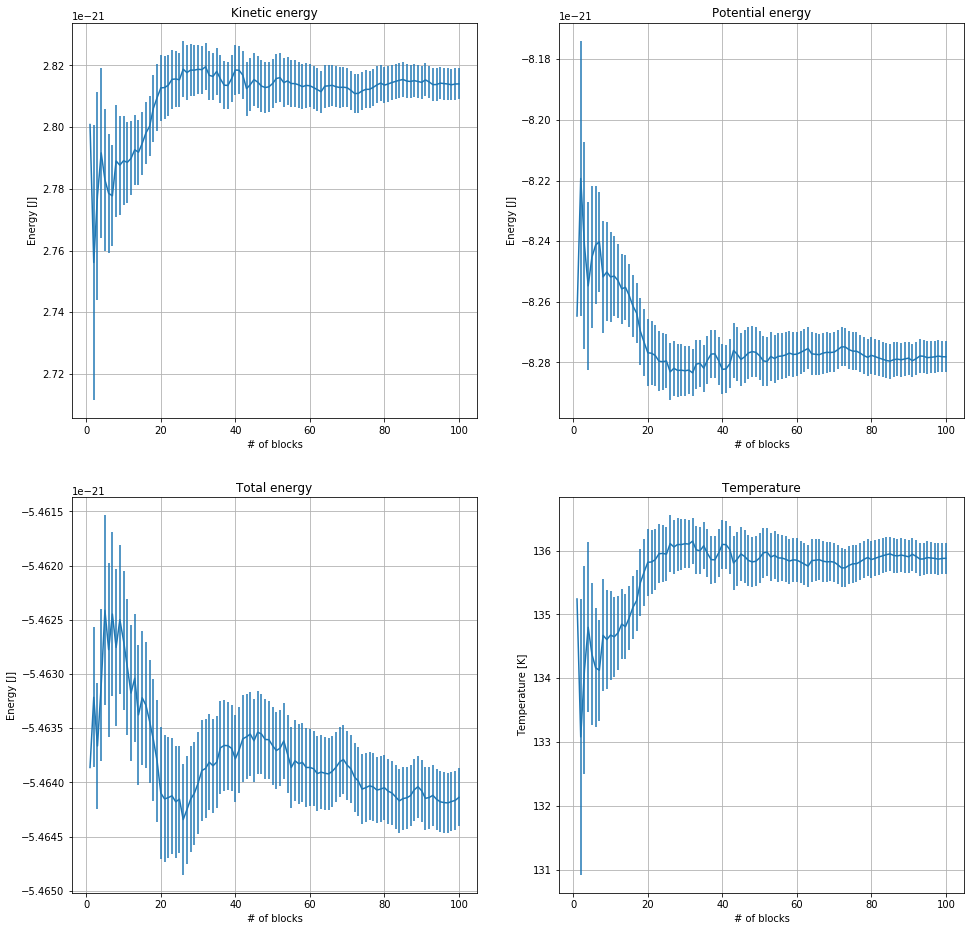

On the last block
Kinetic energy:  2.813999140946695e-21 ± 4.996236134716406e-24
Potential energy:  -8.278136777991063e-21 ± 5.097942404852532e-24
Total energy:  -5.4641376353875895e-21 ± 2.688006186990183e-25
Temperature:  135.87813264 ± 0.24125069064000002


In [7]:
blocksA, ekin, err_ekin=np.loadtxt("final_liquid/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksB, epot, err_epot=np.loadtxt("final_liquid/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksC, etot, err_etot=np.loadtxt("final_liquid/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksD, temp, err_temp=np.loadtxt("final_liquid/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.errorbar(blocksA, ekin*120*Kb, yerr=err_ekin*120*Kb)
plt.title("Kinetic energy")
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(222)
plt.errorbar(blocksB, epot*120*Kb, yerr=err_epot*120*Kb)
plt.title('Potential energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(223)
plt.errorbar(blocksC, etot*120*Kb, yerr=err_etot*120*Kb)
plt.title('Total energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(224)
plt.errorbar(blocksD, temp*120, yerr=err_temp*120)
plt.title('Temperature')
plt.xlabel('# of blocks')
plt.ylabel("Temperature [K]")
plt.grid(True)

plt.show()

print('On the last block')
print('Kinetic energy: ', ekin[99]*120*Kb, '±', err_ekin[99]*120*Kb)
print('Potential energy: ', epot[99]*120*Kb, '±', err_epot[99]*120*Kb)
print('Total energy: ', etot[99]*120*Kb, '±', err_etot[99]*120*Kb)
print('Temperature: ', temp[99]*120, '±', err_temp[99]*120)

What was said before for the solid phase applies here as well. The target temperature was $132K$ this time.

### Gas

For the gas phase we use: $\rho^*=0.05$, $T^*=1.2$ (cut-off radius: $r_c=5.0$) in LJ units.
We simulate the evolution of the system starting from the last liquid configuration.
Again we first equilibrate the system, repeating a cycle of $1000$ steps eighteen times (given the complexity of properly simulating a gas phase), using the last configuration of a cycle as the starting point for the next one.

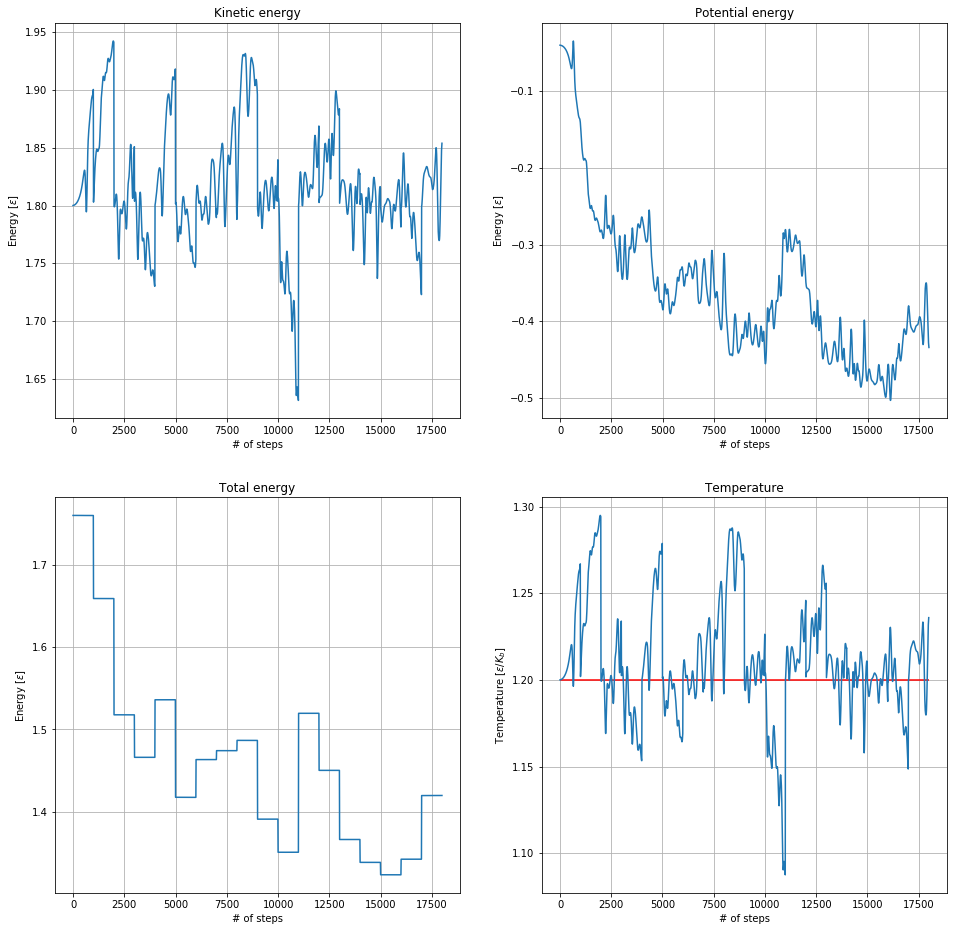

In [8]:
ekin=np.loadtxt("final_gas/EQoutput_ekin.dat")
epot=np.loadtxt("final_gas/EQoutput_epot.dat")
etot=np.loadtxt("final_gas/EQoutput_etot.dat")
temp=np.loadtxt("final_gas/EQoutput_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(steps, ekin)
plt.title("Kinetic energy")
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(222)
plt.plot(steps, epot)
plt.title('Potential energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(223)
plt.plot(steps, etot)
plt.title('Total energy')
plt.xlabel('# of steps')
plt.ylabel(r"Energy [$\varepsilon$]")
plt.grid(True)

plt.subplot(224)
plt.hlines(1.2,0,len(temp)*10, color='red')
plt.plot(steps, temp)
plt.title('Temperature')
plt.xlabel('# of steps')
plt.ylabel(r"Temperature [$\varepsilon/K_b$]")
plt.grid(True)

plt.show()

We can see that the system has reached the equilibrium as the energies and the temperature don't change significantly during the last cycles.

We can now simulate a larger numbers of steps and find average values. We procede with $10^5$ steps divided in $100$ blocks.

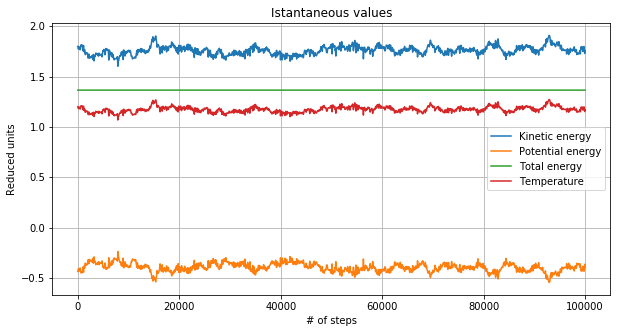

In [9]:
ekin=np.loadtxt("final_gas/output_ekin.dat")
epot=np.loadtxt("final_gas/output_epot.dat")
etot=np.loadtxt("final_gas/output_etot.dat")
temp=np.loadtxt("final_gas/output_temp.dat")
steps = 10*np.arange(len(temp)) #One measurement every 10 steps

plt.figure(figsize=(10,5))
plt.plot(steps, ekin, label='Kinetic energy')
plt.plot(steps, epot, label='Potential energy')
plt.plot(steps, etot, label='Total energy')
plt.plot(steps, temp, label='Temperature')
plt.title('Istantaneous values')
plt.xlabel('# of steps')
plt.ylabel('Reduced units')
plt.legend()
plt.grid(True)

plt.show()

By plotting instantaneous values of the energies and the temperature we can clearly see how the total energy changes very little compared to the others quantities (which do oscillate more than the other two phases). Once again the Verlet algorithm is working as intended.

The following graph shows instead average values and their uncertainties.

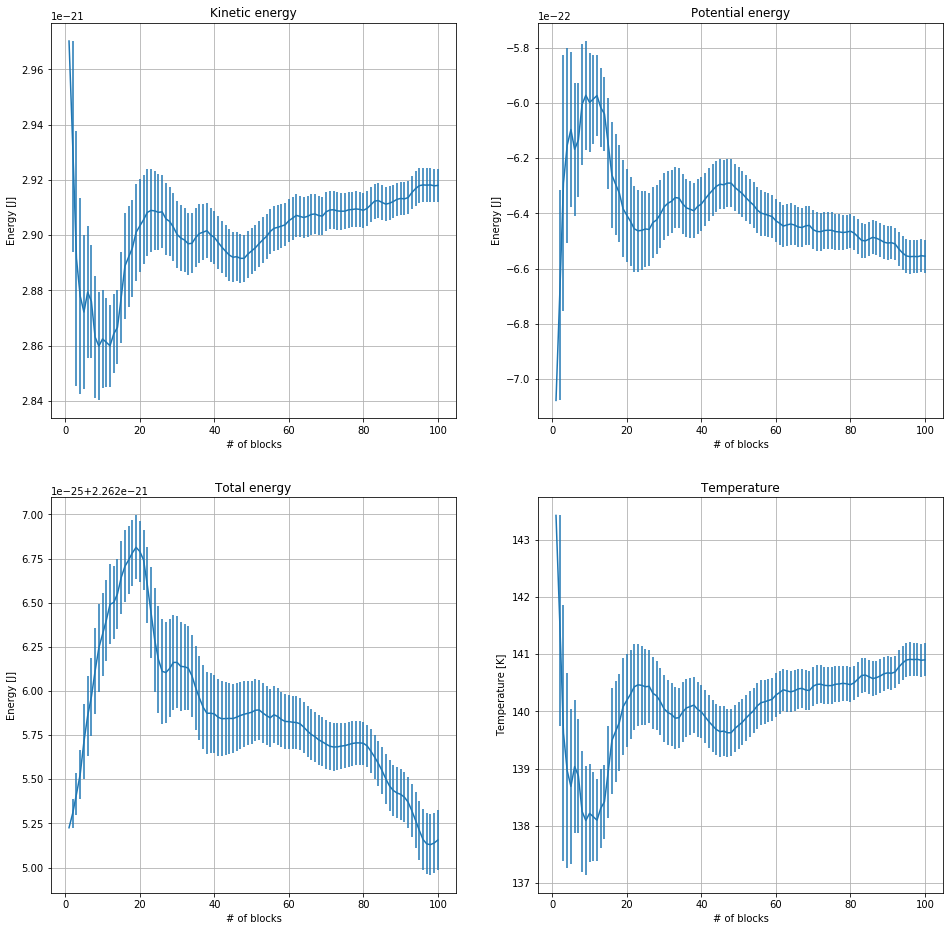

On the last block
Kinetic energy:  2.918037028213021e-21 ± 5.942238958652571e-24
Potential energy:  -6.555214017798381e-22 ± 5.947746354553664e-24
Total energy:  2.2625156259361488e-21 ± 1.687356922409578e-26
Temperature:  140.90175671999998 ± 0.2869298436


In [10]:
blocksA, ekin, err_ekin=np.loadtxt("final_gas/ave_ekin.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksB, epot, err_epot=np.loadtxt("final_gas/ave_epot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksC, etot, err_etot=np.loadtxt("final_gas/ave_etot.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksD, temp, err_temp=np.loadtxt("final_gas/ave_temp.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.errorbar(blocksA, ekin*120*Kb, yerr=err_ekin*120*Kb)
plt.title("Kinetic energy")
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(222)
plt.errorbar(blocksB, epot*120*Kb, yerr=err_epot*120*Kb)
plt.title('Potential energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(223)
plt.errorbar(blocksC, etot*120*Kb, yerr=err_etot*120*Kb)
plt.title('Total energy')
plt.xlabel('# of blocks')
plt.ylabel("Energy [J]")
plt.grid(True)

plt.subplot(224)
plt.errorbar(blocksD, temp*120, yerr=err_temp*120)
plt.title('Temperature')
plt.xlabel('# of blocks')
plt.ylabel("Temperature [K]")
plt.grid(True)

plt.show()

print('On the last block')
print('Kinetic energy: ', ekin[99]*120*Kb, '±', err_ekin[99]*120*Kb)
print('Potential energy: ', epot[99]*120*Kb, '±', err_epot[99]*120*Kb)
print('Total energy: ', etot[99]*120*Kb, '±', err_etot[99]*120*Kb)
print('Temperature: ', temp[99]*120, '±', err_temp[99]*120)

The average values this time oscillate more and it is not clear if they reached a final value or not. However, it can be seen once again that the error on the total energy is inferior than the one on kinetic and potential energies and that the temperature reached is not the target one ($144K$).

## <span style="color:green"> Optional exercise</span>

The code was updated to include the calculation of the pressure $P$ (istantaneous values, average values and uncertainties).

Using the virial theorem, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

In the following graphs we plot the estimate values of pressure for the three phases (using the same number of blocks, steps and the same starting configurations as the main simulation done before).

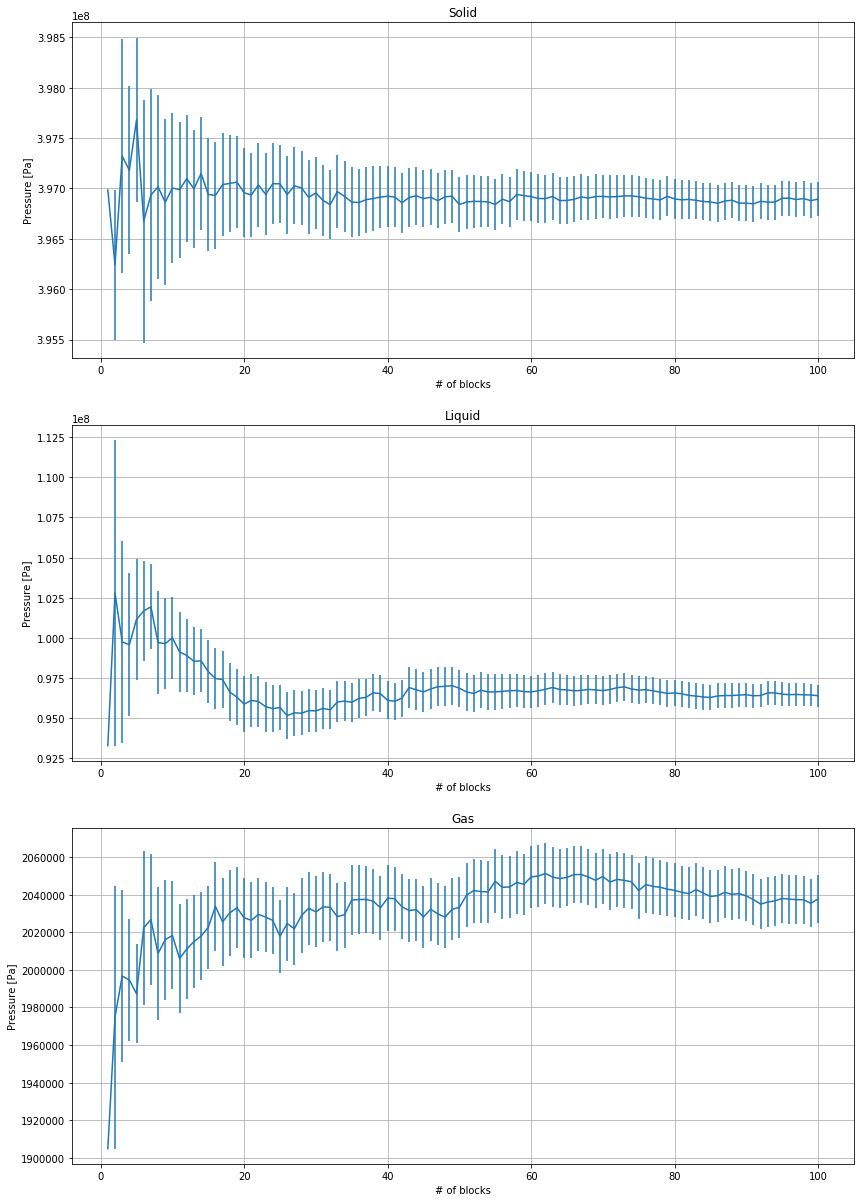

On the last block
Solid:  396893096.2231588 ± 169545.78239219176
Liquid:  96395522.5392073 ± 694216.5744438014
Gas:  2037746.5420677678 ± 12886.158299790299


In [11]:
blocksS, presS, err_presS=np.loadtxt("final_solid/ave_pres.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksL, presL, err_presL=np.loadtxt("final_liquid/ave_pres.out", usecols=(0,1,2), delimiter="   ", unpack='true' )
blocksG, presG, err_presG=np.loadtxt("final_gas/ave_pres.out", usecols=(0,1,2), delimiter="   ", unpack='true' )

fig = plt.figure(figsize=(14,21))

plt.subplot(311)
plt.errorbar(blocksS, presS*120*Kb/((0.34e-09)**3), yerr=err_presS*120*Kb/((0.34e-09)**3))
plt.title("Solid")
plt.xlabel('# of blocks')
plt.ylabel("Pressure [Pa]")
plt.grid(True)

plt.subplot(312)
plt.errorbar(blocksL, presL*120*Kb/((0.34e-09)**3), yerr=err_presL*120*Kb/((0.34e-09)**3))
plt.title("Liquid")
plt.xlabel('# of blocks')
plt.ylabel("Pressure [Pa]")
plt.grid(True)

plt.subplot(313)
plt.errorbar(blocksG, presG*120*Kb/((0.34e-09)**3), yerr=err_presG*120*Kb/((0.34e-09)**3))
plt.title("Gas")
plt.xlabel('# of blocks')
plt.ylabel("Pressure [Pa]")
plt.grid(True)

plt.show()

print('On the last block')
print('Solid: ', presS[99]*120*Kb/((0.34e-09)**3), '±', err_presS[99]*120*Kb/((0.34e-09)**3))
print('Liquid: ', presL[99]*120*Kb/((0.34e-09)**3), '±', err_presL[99]*120*Kb/((0.34e-09)**3))
print('Gas: ', presG[99]*120*Kb/((0.34e-09)**3), '±', err_presG[99]*120*Kb/((0.34e-09)**3))